In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('../images/dark2.png', 0)
print(img)

[[21 21 24 ...  2  2  5]
 [24 21 21 ...  2  5 10]
 [21 26 13 ...  2  2 26]
 ...
 [ 2 21 21 ... 18 18  5]
 [ 2 21 24 ... 21  5  5]
 [ 7 29 26 ... 21  7  8]]


In [4]:
img_float = img.astype(np.float16) # Convert to float for log transformation
c = 255 / (np.log(1 + np.max(img_float))) # Constant for scaling
print(c)
print(np.max(img_float), np.log(1 + np.max(img_float)))

64.9
50.0 3.932


In [5]:
#1
log_img = c * np.log(1 + img_float)
print(log_img)
log_img = log_img.astype(np.uint8)  # Convert back to uint8 for display

[[200.6  200.6  208.9  ...  71.25  71.25 116.25]
 [208.9  200.6  200.6  ...  71.25 116.25 155.6 ]
 [200.6  213.8  171.1  ...  71.25  71.25 213.8 ]
 ...
 [ 71.25 200.6  200.6  ... 191.1  191.1  116.25]
 [ 71.25 200.6  208.9  ... 200.6  116.25 116.25]
 [135.   220.6  213.8  ... 200.6  135.   142.5 ]]


In [6]:
cv2.imshow("resuslt", log_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

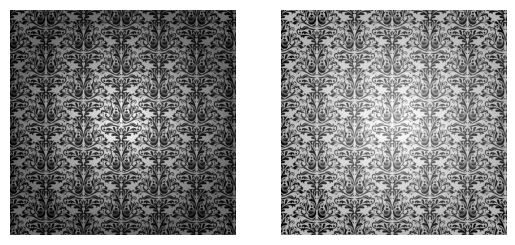

In [7]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img, cmap='gray'
           )
plt.axis('off')

plt.show()

In [8]:
#2
log_img1 = np.zeros_like(img, dtype='float')
print(log_img1)
row, col = log_img1.shape

print(row, col)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
700 700


In [9]:
for i in range(row):
    for j in range(col):
        log_img1[i,j] = c * np.log(1 + img_float[i, j])

log_img1 = log_img1.astype(np.uint8)

In [10]:
cv2.imshow("result", log_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(np.float64(-0.5), np.float64(699.5), np.float64(699.5), np.float64(-0.5))

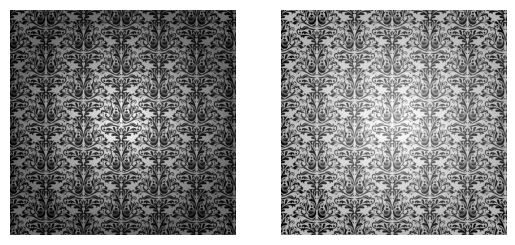

In [12]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(log_img1, cmap='gray')
plt.axis('off')

In [16]:
# 3
table = np.array([ i for i in range(256)]).astype(np.float16)
log_table = c * np.log(1 + table)
log_table = log_table.astype(np.uint8)

print(table)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [17]:
log_img2 = cv2.LUT(img, log_table)
print(log_img2)

[[200 200 208 ...  71  71 116]
 [208 200 200 ...  71 116 155]
 [200 213 171 ...  71  71 213]
 ...
 [ 71 200 200 ... 191 191 116]
 [ 71 200 208 ... 200 116 116]
 [135 220 213 ... 200 135 142]]


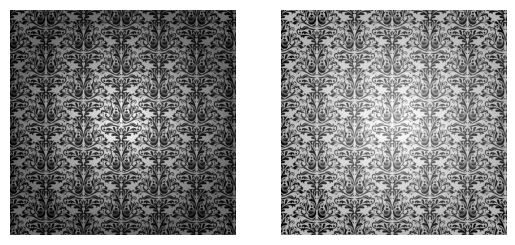

In [18]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1,2,2)
plt.imshow(log_img2, cmap='gray')
plt.axis("off")

plt.show()